In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np

# 2. Load your uploaded CSV file
df = pd.read_csv('/content/Sales Transaction v.4a.csv')

# 3. Preview the first few rows
df.head()


,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [ ]:
# Safe date parsing with mixed formats
df['Date'] = pd.to_datetime(df['Date'], format='mixed')


In [ ]:
df['TotalAmount'] = df['Price'] * df['Quantity']

In [ ]:
df = df.dropna(subset=['CustomerNo'])

In [ ]:

# Remove negative or zero quantities/prices
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]

In [ ]:
# Preview cleaned data
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,TotalSales
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,257.64
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,383.40
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,138.36
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,127.80
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,71.64


In [ ]:
# Summary stats for numerical columns
df.describe()

,Date,Price,Quantity,CustomerNo,TotalAmount
count,527764,527764.000000,527764.000000,527764.000000,5.277640e+05
mean,2019-07-04 05:58:58.445213952,12.629640,10.594679,15231.626733,1.193069e+02
min,2018-12-01 00:00:00,5.130000,1.000000,12004.000000,5.130000e+00
25%,2019-03-28 00:00:00,10.990000,1.000000,13813.000000,1.717000e+01
50%,2019-07-20 00:00:00,11.940000,3.000000,15159.000000,4.383000e+01
75%,2019-10-19 00:00:00,14.090000,11.000000,16729.000000,1.194000e+02
max,2019-12-09 00:00:00,660.620000,80995.000000,18287.000000,1.002718e+06
std,NaN,7.933224,156.786795,1716.522182,1.851192e+03


In [ ]:

# Unique values
df.nunique()

,0
TransactionNo,19789
Date,305
ProductNo,3753
ProductName,3753
Price,514
Quantity,375
CustomerNo,4718
Country,38
TotalAmount,5626


In [ ]:
# Transactions over time
df['Date'].min(), df['Date'].max()

(Timestamp('2018-12-01 00:00:00'), Timestamp('2019-12-09 00:00:00'))

In [ ]:
# Null value check
df.isnull().sum()

,0
TransactionNo,0
Date,0
ProductNo,0
ProductName,0
Price,0
Quantity,0
CustomerNo,0
Country,0
TotalAmount,0


In [ ]:

# Check for duplicates
df.duplicated().sum()

np.int64(5163)

In [ ]:
# Top 10 most sold products
top_products = df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)

# Top 10 countries by revenue
top_countries = df.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False).head(10)

# Top 10 customers by spending
top_customers = df.groupby('CustomerNo')['TotalAmount'].sum().sort_values(ascending=False).head(10)

top_products, top_countries, top_customers


(ProductName
 Paper Craft Little Birdie             80995
 Medium Ceramic Top Storage Jar        78033
 Popcorn Holder                        56921
 World War 2 Gliders Asstd Designs     55047
 Jumbo Bag Red Retrospot               48478
 Cream Hanging Heart T-Light Holder    37956
 Pack Of 72 Retrospot Cake Cases       36515
 Assorted Colour Bird Ornament         36493
 Rabbit Night Light                    30788
 Mini Paint Set Vintage                26633
 Name: Quantity, dtype: int64,
 Country
 United Kingdom    52524576.47
 Netherlands        2151553.59
 EIRE               1713410.95
 Germany            1371543.27
 France             1330652.89
 Australia           995607.91
 Sweden              401879.89
 Switzerland         361969.25
 Japan               293155.44
 Spain               281012.27
 Name: TotalAmount, dtype: float64,
 CustomerNo
 14646.0    2112282.03
 16446.0    1002741.57
 14911.0     914633.52
 12415.0     900545.54
 18102.0     897137.36
 17450.0     891438.53
 

In [ ]:
# Grouping data by date for daily sales
daily_sales = df.groupby('Date')['TotalAmount'].sum().reset_index()

# Add Month and Year columns for aggregation
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['TotalAmount'].sum().reset_index()


<ipython-input-149-7c97b221bea1>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




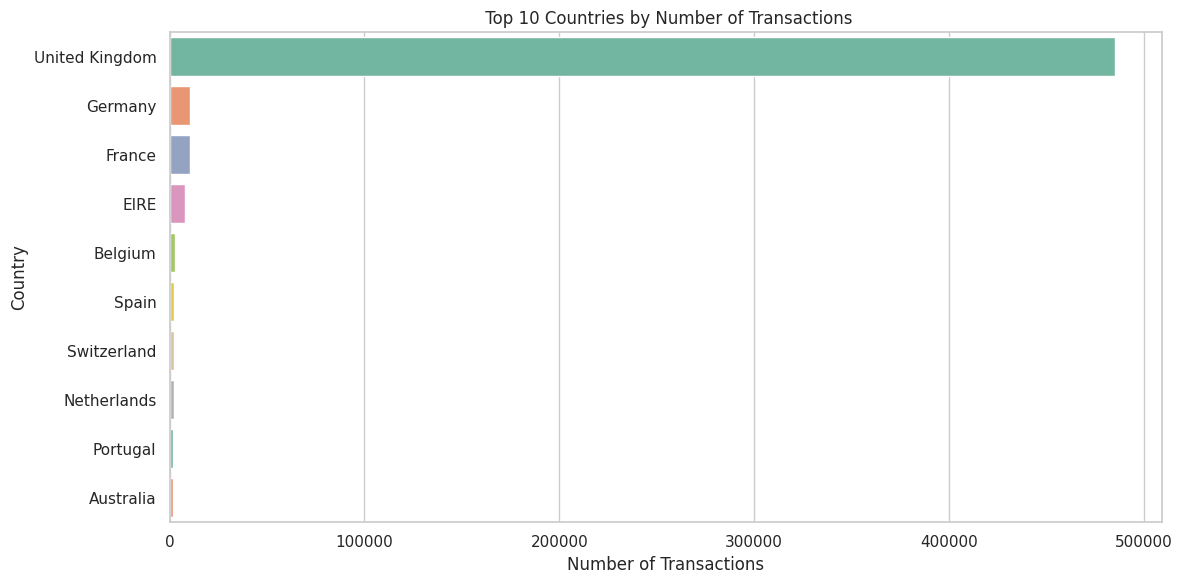

In [ ]:
country_txn = df['Country'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=country_txn.values, y=country_txn.index, palette='Set2')
plt.title(' Top 10 Countries by Number of Transactions')
plt.xlabel('Number of Transactions')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


In [ ]:
region_revenue = df.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=region_revenue.values, y=region_revenue.index, palette='flare')
plt.title(' Revenue by Country')
plt.xlabel('Total Revenue')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


KeyError: 'Column not found: TotalAmount'

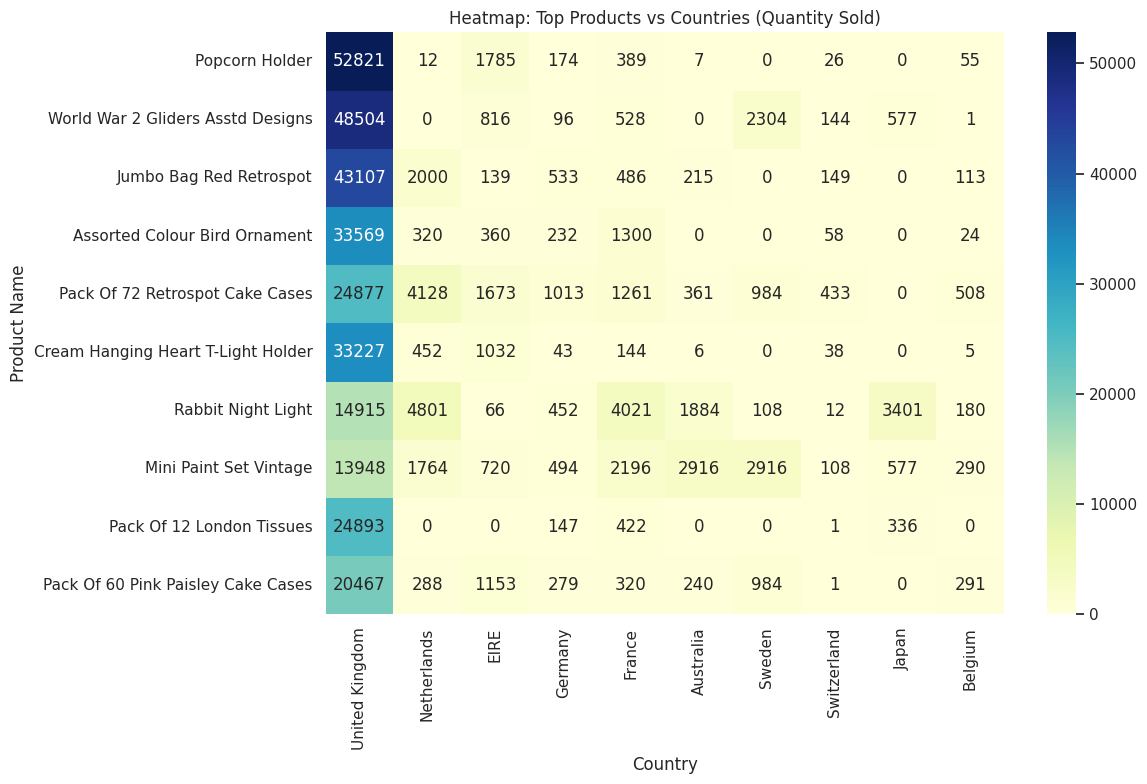

In [ ]:
pivot_table = df.pivot_table(index='ProductName', columns='Country', values='Quantity', aggfunc='sum', fill_value=0)
top_products = pivot_table.sum(axis=1).sort_values(ascending=False).head(10).index
top_countries = pivot_table.sum(axis=0).sort_values(ascending=False).head(10).index

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table.loc[top_products, top_countries], cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("Heatmap: Top Products vs Countries (Quantity Sold)")
plt.xlabel("Country")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()


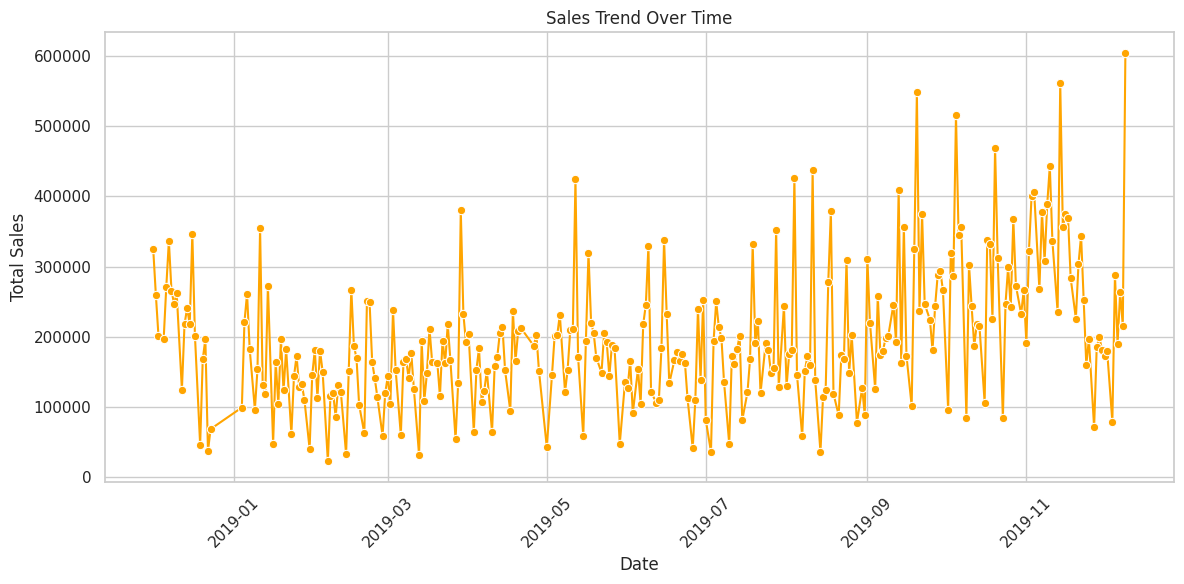

In [ ]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Create a new column for Total Sales
df['TotalSales'] = df['Price'] * df['Quantity']

# Group by Date and aggregate total sales
daily_sales = df.groupby('Date')['TotalSales'].sum()

# Plot the sales trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_sales.index, y=daily_sales.values, marker='o', color='orange')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





In [ ]:
import plotly.express as px
import pandas as pd

# Group by country and sum total sales
country_sales = df.groupby('Country')['TotalSales'].sum().reset_index()
country_sales['TotalSales(M)'] = country_sales['TotalSales'] / 1e6  # Convert to millions

# Finer bins for 0–2M + standard bins above that
bins = [0, 0.2, 0.5, 1, 1.5, 2, 4, 6, 8, 10, 20, 30, 40, 50, float('inf')]
labels = [
    '0–0.2M', '0.2–0.5M', '0.5–1M', '1–1.5M', '1.5–2M',
    '2–4M', '4–6M', '6–8M', '8–10M',
    '10–20M', '20–30M', '30–40M', '40–50M', '50M+'
]

country_sales['SalesRange'] = pd.cut(
    country_sales['TotalSales(M)'],
    bins=bins,
    labels=labels,
    right=False
)

# Vibrant color map
color_map = {
    '0–0.2M': '#ffe6e6',
    '0.2–0.5M': '#ffcccc',
    '0.5–1M': '#ff9999',
    '1–1.5M': '#ff6666',
    '1.5–2M': '#ff3333',
    '2–4M': '#e60000',
    '4–6M': '#cc0000',
    '6–8M': '#990000',
    '8–10M': '#660000',
    '10–20M': '#ff9900',
    '20–30M': '#ffcc00',
    '30–40M': '#ccff33',
    '40–50M': '#99ff33',
    '50M+': '#33cc33'
}

# Plot
fig = px.choropleth(
    country_sales,
    locations='Country',
    locationmode='country names',
    color='SalesRange',
    hover_name='Country',
    color_discrete_map=color_map,
    title='Total Sales by Country (Highly Refined Low-End Ranges RRN : 19,20,21,22,23,24)'
)

fig.update_layout(legend_title_text='Sales Range')
fig.show()





<ipython-input-154-9dbf07a8dd7b>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




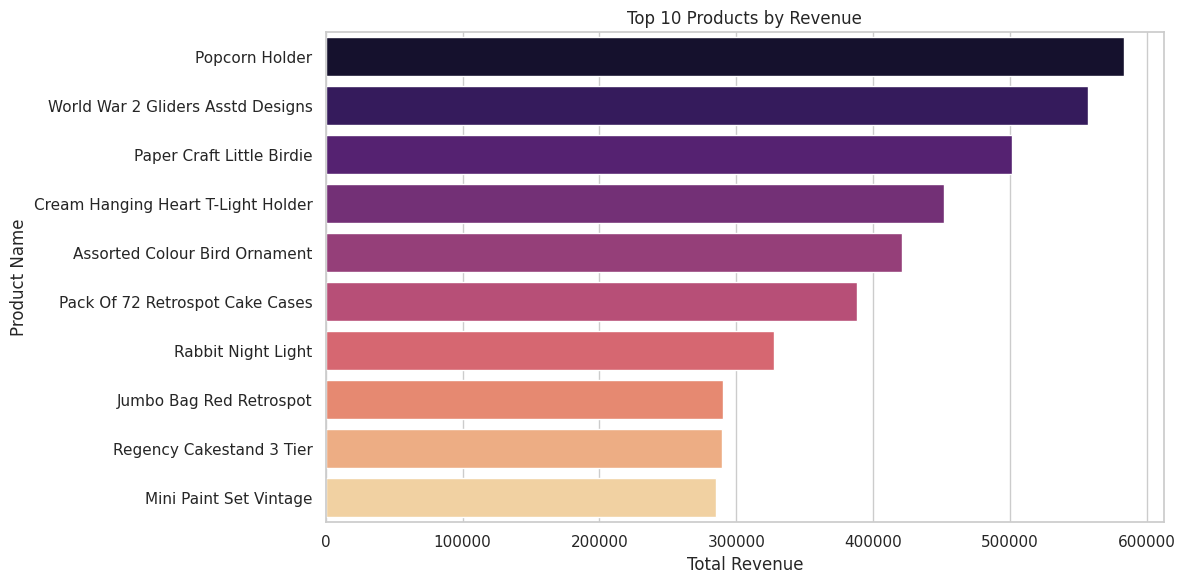

In [ ]:
top_products_rev = df.groupby('ProductName')['TotalSales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_products_rev.values, y=top_products_rev.index, palette='magma')
plt.title("Top 10 Products by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()


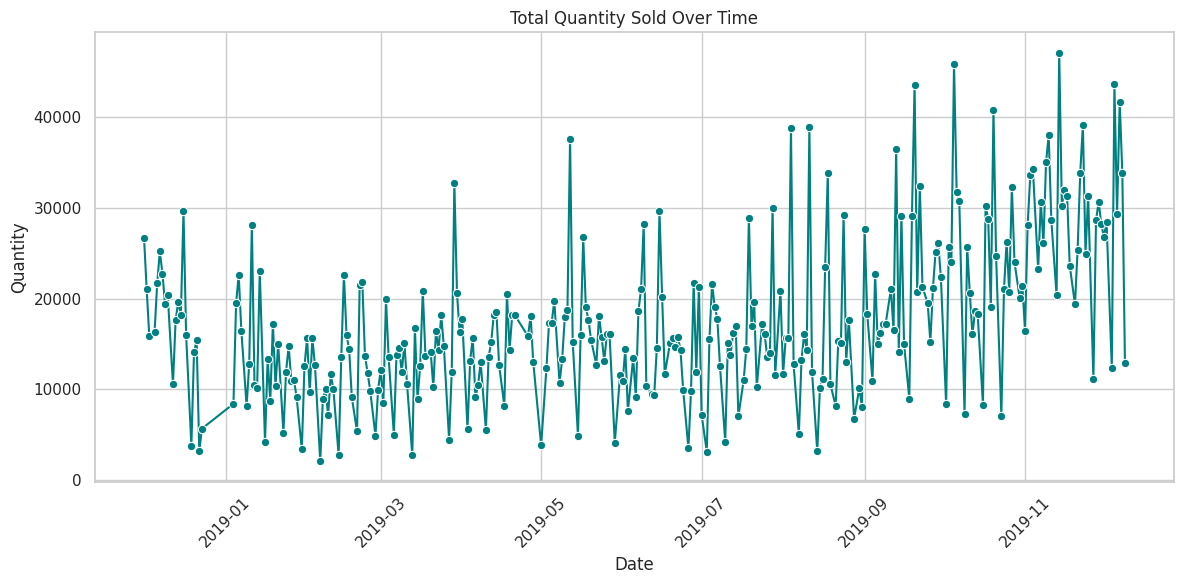

In [ ]:
daily_qty = df.groupby('Date')['Quantity'].sum()

plt.figure(figsize=(12,6))
sns.lineplot(x=daily_qty.index, y=daily_qty.values, marker='o', color='teal')
plt.title("Total Quantity Sold Over Time")
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-156-b4b891915be5>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




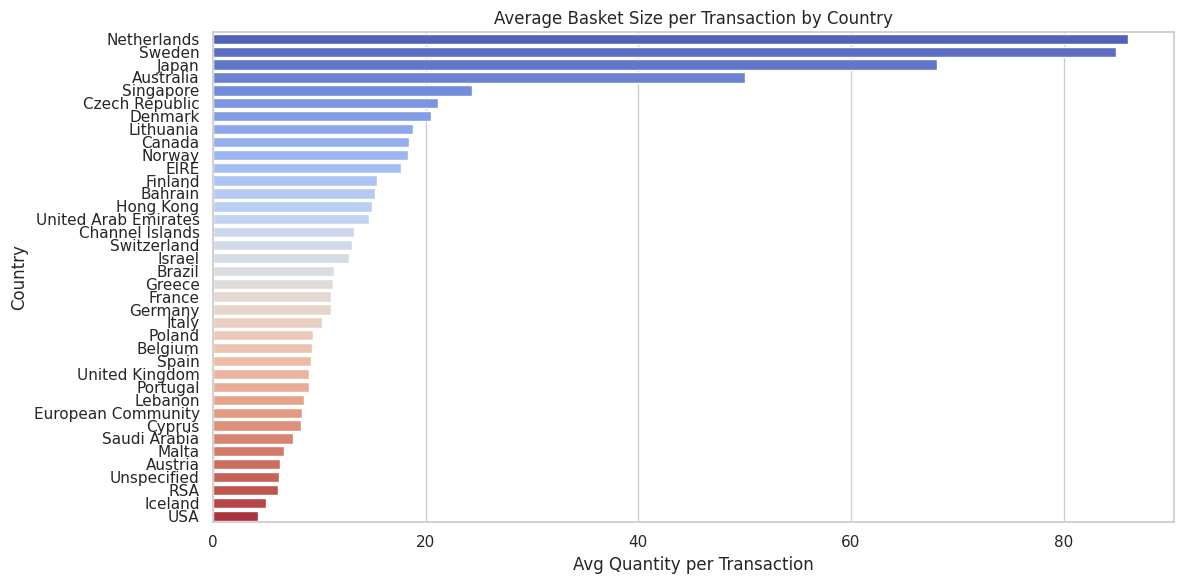

In [ ]:
basket_size = df.groupby('Country')['Quantity'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=basket_size.values, y=basket_size.index, palette='coolwarm')
plt.title("Average Basket Size per Transaction by Country")
plt.xlabel("Avg Quantity per Transaction")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


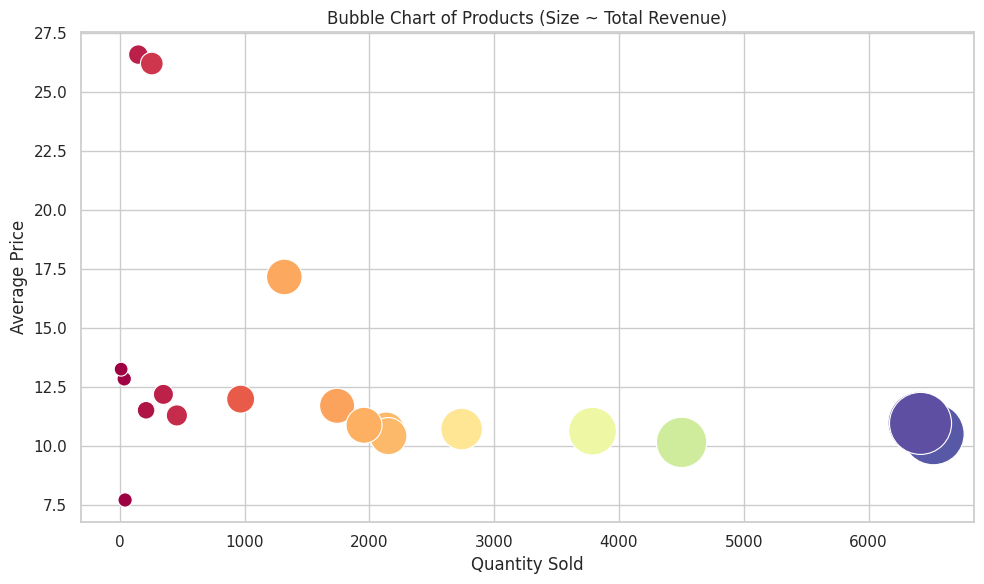

In [ ]:
plt.figure(figsize=(10,6))
bubble_data = df.groupby('ProductName').agg({'TotalSales': 'sum', 'Quantity': 'sum', 'Price': 'mean'}).reset_index().head(20)
sns.scatterplot(data=bubble_data, x='Quantity', y='Price', size='TotalSales', hue='TotalSales', palette='Spectral', legend=False, sizes=(100, 2000))
plt.title('Bubble Chart of Products (Size ~ Total Revenue)')
plt.xlabel('Quantity Sold')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()


ValueError: When stacked is True, each column must be either all positive or all negative. Column 'Netherlands' contains both positive and negative values

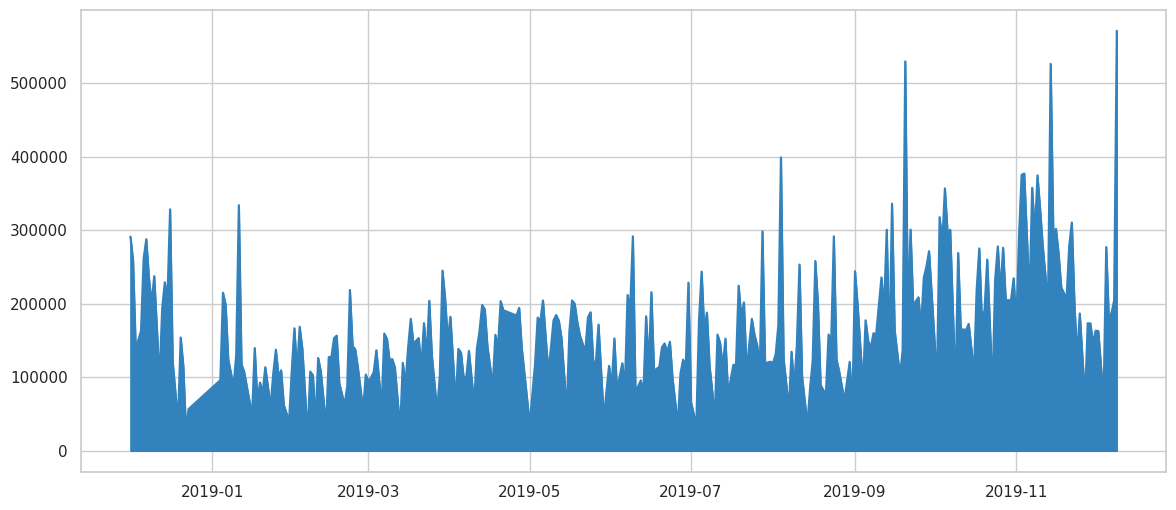

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
area_data = df.groupby(['Date', 'Country'])['TotalSales'].sum().unstack().fillna(0)
top_countries = area_data.sum().sort_values(ascending=False).head(5).index
area_data = area_data[top_countries]

area_data.plot.area(figsize=(14,6), colormap='tab20c')
plt.title("Cumulative Sales Trend by Top 5 Countries")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()



/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning:

Ignoring `palette` because no `hue` variable has b

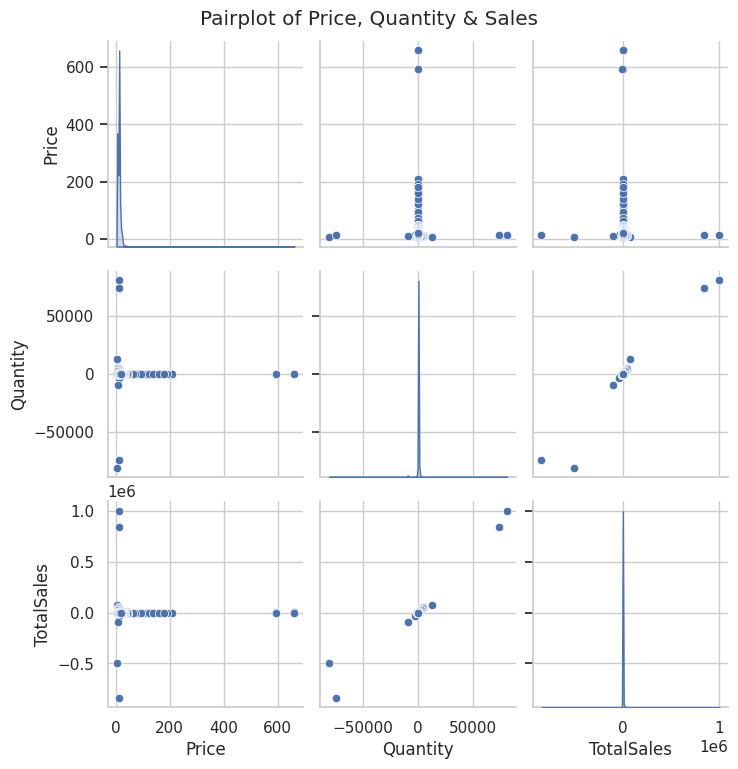

In [ ]:

sns.pairplot(df[['Price', 'Quantity', 'TotalSales']], diag_kind='kde', palette='husl')
plt.suptitle("Pairplot of Price, Quantity & Sales", y=1.02)
plt.show()


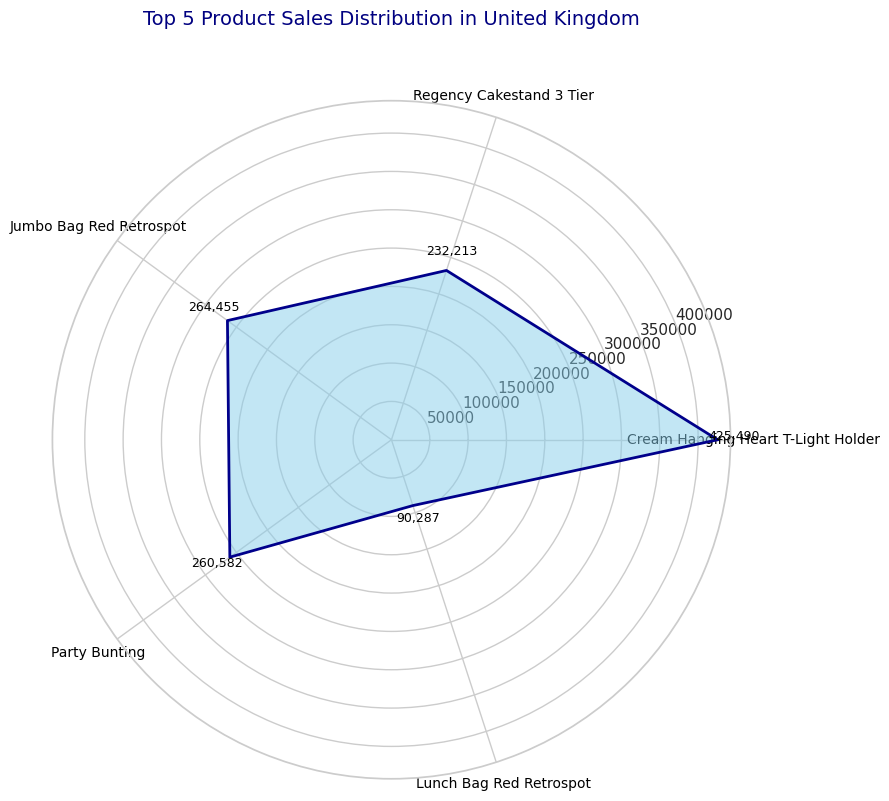

In [ ]:
from math import pi

# Choose a country (can change to any country present in the dataset)
selected_country = 'United Kingdom'

# Prepare data
pivot = df.pivot_table(index='Country', columns='ProductName', values='TotalSales', aggfunc='sum', fill_value=0)

# Get top 5 products overall
top_products = df['ProductName'].value_counts().head(5).index

# Extract data for selected country
radar_data = pivot.loc[selected_country, top_products].T
categories = list(top_products)
values = radar_data.tolist()
values += values[:1]  # Close the loop

# Calculate angles
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

# Plot
plt.figure(figsize=(9, 9))
ax = plt.subplot(111, polar=True)

# Draw outline
ax.plot(angles, values, linewidth=2, linestyle='solid', color='darkblue')
ax.fill(angles, values, 'skyblue', alpha=0.5)

# Add labels
plt.xticks(angles[:-1], categories, color='black', size=10)
for i in range(len(categories)):
    ax.text(angles[i], values[i] + max(values)*0.05, f"{values[i]:,.0f}", ha='center', size=9, color='black')

# Add title
plt.title(f"Top 5 Product Sales Distribution in {selected_country}", size=14, color='navy', y=1.1)

plt.tight_layout()
plt.show()




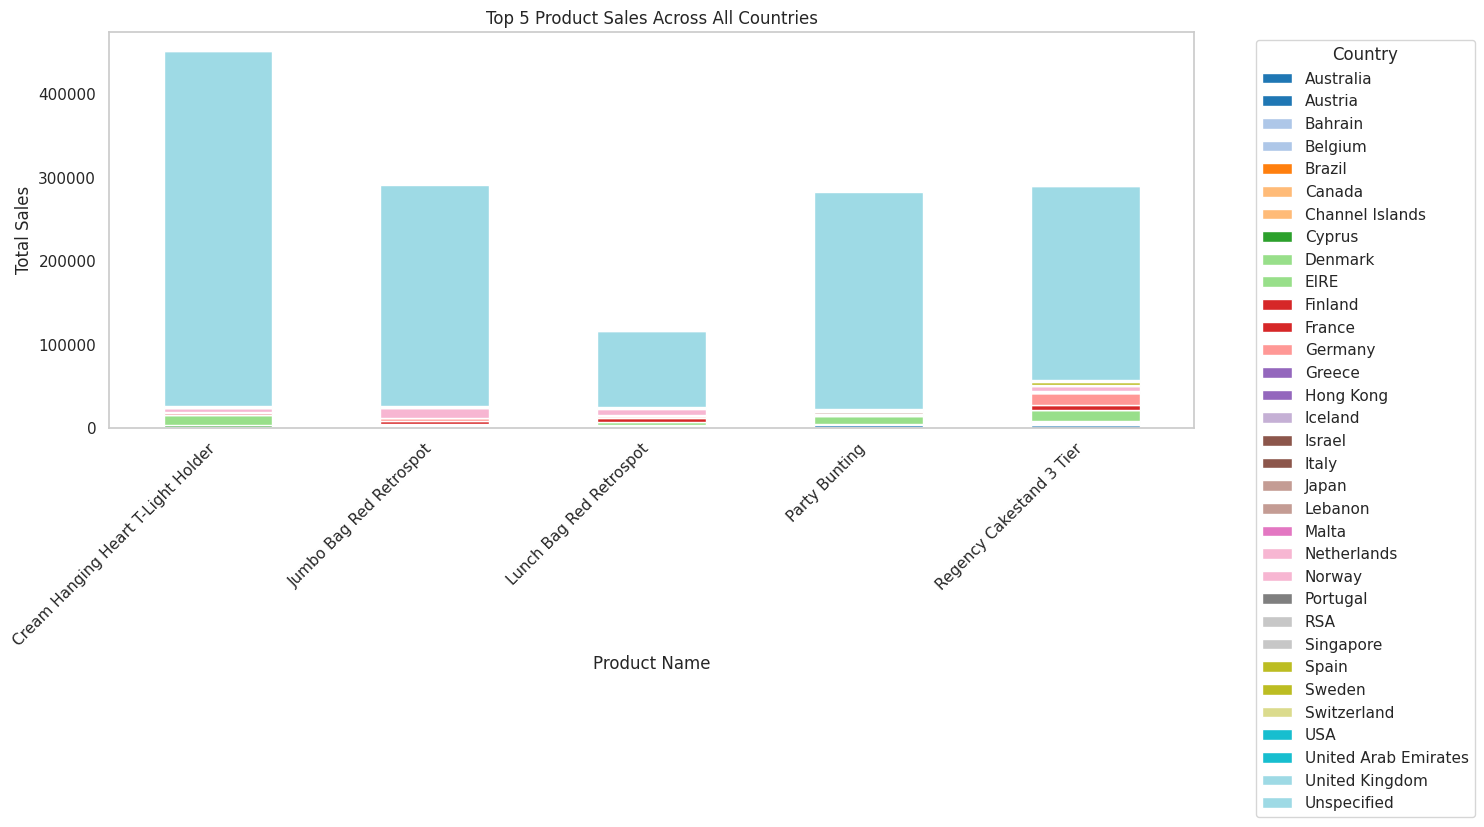

In [ ]:
import matplotlib.pyplot as plt

# Get top 5 products overall
top_products = df['ProductName'].value_counts().head(5).index

# Filter data for only top products
filtered_df = df[df['ProductName'].isin(top_products)]

# Group by ProductName and Country
grouped = filtered_df.groupby(['ProductName', 'Country'])['TotalSales'].sum().unstack().fillna(0)

# Plot
grouped.plot(kind='bar', stacked=True, figsize=(15, 7), colormap='tab20')
plt.title('Top 5 Product Sales Across All Countries')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



In [ ]:
import plotly.express as px

# Aggregate total sales by Country and Product
treemap_data = df.groupby(['Country', 'ProductName'])['TotalSales'].sum().reset_index()

# Filter top 10 countries and top 5 products for readability
top_countries = treemap_data.groupby('Country')['TotalSales'].sum().nlargest(10).index
filtered_data = treemap_data[treemap_data['Country'].isin(top_countries)]

# Optional: filter top 5 products within each country for better clarity
filtered_data = filtered_data.groupby(['Country']).apply(lambda x: x.nlargest(5, 'TotalSales')).reset_index(drop=True)

# Plot treemap
fig = px.treemap(
    filtered_data,
    path=['Country', 'ProductName'],
    values='TotalSales',
    color='TotalSales',
    color_continuous_scale='Tealrose',
    title='Interactive Treemap of Product Sales by Country'
)

fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()



<ipython-input-167-08e17e8619f0>:11: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [ ]:
import plotly.express as px
import pandas as pd

# Convert date column
df['Date'] = pd.to_datetime(df['Date'])

# Top 3 Countries and Top 3 Products to limit Gantt chart clutter
top_countries = df['Country'].value_counts().head(3).index
top_products = df['ProductName'].value_counts().head(3).index

# Filter data
filtered = df[df['Country'].isin(top_countries) & df['ProductName'].isin(top_products)]

# Create a start and end (simulate sales window by grouping)
grouped = (
    filtered.groupby(['Country', 'ProductName'])
    .agg(Start=('Date', 'min'), End=('Date', 'max'))
    .reset_index()
)

# Create a task name
grouped['Task'] = grouped['Country'] + " - " + grouped['ProductName']

# Plot Gantt chart
fig = px.timeline(grouped, x_start="Start", x_end="End", y="Task", color="Country")
fig.update_yaxes(autorange="reversed")  # Optional: most recent on top
fig.update_layout(title="Gantt Chart: Product Sales Timeline per Country")
fig.show()





In [ ]:
import plotly.express as px
import pandas as pd

# Convert date column
df['Date'] = pd.to_datetime(df['Date'])

# Create a sunburst chart
fig = px.sunburst(
    df,
    path=['Country', 'ProductName'],  # Hierarchical structure: Country -> ProductName
    title="Sunburst Chart: Product Sales by Country"
)

fig.show()




In [ ]:
# Final cleaned dataset save
df.to_csv("sales_data.csv", index=False)


In [ ]:
!pip install streamlit pyngrok --quiet


ERROR: Operation cancelled by user


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Config
st.set_page_config(layout="wide")
st.title("📊 Sales Dashboard")

@st.cache_data
def load_data():
    df = pd.read_csv("sales_data.csv")
    df['Date'] = pd.to_datetime(df['Date'], format='mixed')
    df['TotalAmount'] = df['Price'] * df['Quantity']
    df = df.dropna(subset=['CustomerNo'])
    df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]
    df['Month'] = df['Date'].dt.to_period('M')
    return df

df = load_data()

# Sidebar filters
country_filter = st.sidebar.multiselect("Select Countries", df['Country'].unique(), default=df['Country'].unique())
df_filtered = df[df['Country'].isin(country_filter)]

# Visual 1: Transactions by Country
st.subheader("Top 10 Countries by Number of Transactions")
country_txn = df_filtered['Country'].value_counts().head(10)

fig1, ax1 = plt.subplots()
sns.barplot(x=country_txn.values, y=country_txn.index, ax=ax1, palette='Set2')
st.pyplot(fig1)

# Visual 2: Revenue by Country
st.subheader("Top 10 Countries by Revenue")
region_revenue = df_filtered.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False).head(10)

fig2, ax2 = plt.subplots()
sns.barplot(x=region_revenue.values, y=region_revenue.index, ax=ax2, palette='flare')
st.pyplot(fig2)

# Visual 3: Time Series - Daily Sales
st.subheader("Daily Sales Over Time")
daily_sales = df_filtered.groupby('Date')['TotalAmount'].sum().reset_index()

fig3, ax3 = plt.subplots(figsize=(12, 5))
sns.lineplot(data=daily_sales, x='Date', y='TotalAmount', ax=ax3)
st.pyplot(fig3)

# Ask question section
st.subheader("Ask a question about the data")
query = st.text_input("What would you like to know? (e.g., 'Which country has the highest revenue?')")

if query:
    if "highest revenue" in query.lower():
        st.write(" Country with highest revenue:", region_revenue.idxmax())
    elif "most transactions" in query.lower():
        st.write(" Country with most transactions:", country_txn.idxmax())
    else:
        st.info("Sorry, I can't answer that question yet.")


Overwriting app.py


In [ ]:
from pyngrok import ngrok
import time

# Kill any running Streamlit processes
!pkill streamlit

# Start Streamlit in the background
!streamlit run app.py &>/content/logs.txt &

# Wait for server to start
time.sleep(5)

# Create a tunnel using HTTP not port-based config
public_url = ngrok.connect("http://localhost:8501")
print("Streamlit is running at:", public_url)


Streamlit is running at: NgrokTunnel: "https://3f89-34-80-116-63.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

st.set_page_config(layout="wide")
st.title("📊 Sales Dashboard")

@st.cache_data
def load_data():
    df = pd.read_csv("sales_data.csv")
    df['Date'] = pd.to_datetime(df['Date'], format='mixed')
    df['TotalAmount'] = df['Price'] * df['Quantity']
    df = df.dropna(subset=['CustomerNo'])
    df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]
    df['Month'] = df['Date'].dt.to_period('M')
    return df

df = load_data()

# Sidebar filters
country_filter = st.sidebar.multiselect("Select Countries", df['Country'].unique(), default=df['Country'].unique())
product_filter = st.sidebar.selectbox("Select Product", df['Description'].unique())

df_filtered = df[
    (df['Country'].isin(country_filter)) &
    (df['Description'] == product_filter)
]

# Visualization: Top Countries by Transactions
st.subheader("Top 10 Countries by Transactions")
top_countries = df_filtered['Country'].value_counts().head(10)
fig1, ax1 = plt.subplots()
sns.barplot(x=top_countries.values, y=top_countries.index, ax=ax1)
st.pyplot(fig1)

# Visualization: Daily Sales
st.subheader("Daily Sales")
daily_sales = df_filtered.groupby('Date')['TotalAmount'].sum().reset_index()
fig2, ax2 = plt.subplots()
sns.lineplot(data=daily_sales, x='Date', y='TotalAmount', ax=ax2)
st.pyplot(fig2)

# Ask a question (placeholder logic)
st.subheader("Ask a question")
query = st.text_input("Ask (e.g., highest revenue country)")
if query:
    st.info("I'm still learning to answer that. Stay tuned!")


Overwriting app.py


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

# Page config
st.set_page_config(layout="wide")
st.title("📊 Interactive Sales Dashboard")

# Load and preprocess data
@st.cache_data
def load_data():
    df = pd.read_csv("sales_data.csv")
    df['Date'] = pd.to_datetime(df['Date'], format='mixed')
    df['TotalAmount'] = df['Price'] * df['Quantity']
    df = df.dropna(subset=['CustomerNo'])
    df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]
    df['Month'] = df['Date'].dt.to_period('M').astype(str)
    return df

df = load_data()

# Sidebar filters
st.sidebar.header("🔎 Filter Your Data")
country_filter = st.sidebar.multiselect("Select Countries", df['Country'].unique(), default=df['Country'].unique())
product_filter = st.sidebar.selectbox("Select Product", df['ProductName'].unique())
date_range = st.sidebar.date_input("Select Date Range", [df['Date'].min(), df['Date'].max()])
customer_input = st.sidebar.text_input("Search by Customer No (partial OK)")
top_n = st.sidebar.slider("Top N Products", 1, 20, 10)

# Apply filters
df_filtered = df[
    (df['Country'].isin(country_filter)) &
    (df['ProductName'] == product_filter) &
    (df['Date'] >= pd.to_datetime(date_range[0])) &
    (df['Date'] <= pd.to_datetime(date_range[1]))
]

if customer_input:
    df_filtered = df_filtered[df_filtered['CustomerNo'].astype(str).str.contains(customer_input)]

# --- Visuals Section ---
st.markdown("### 📊 Visual Insights")

col1, col2 = st.columns(2)

with col1:
    st.markdown("#### 📌 Top Countries by Transactions")
    top_countries = df_filtered['Country'].value_counts().head(10)
    fig1, ax1 = plt.subplots()
    sns.barplot(x=top_countries.values, y=top_countries.index, ax=ax1)
    st.pyplot(fig1)

with col2:
    st.markdown("#### 🧺 Basket Size per Customer")
    basket_size = df_filtered.groupby('CustomerNo')['Quantity'].sum().sort_values(ascending=False).head(10)
    fig2, ax2 = plt.subplots()
    sns.barplot(x=basket_size.values, y=basket_size.index, ax=ax2)
    st.pyplot(fig2)

col3, col4 = st.columns(2)

with col3:
    st.markdown("#### 🗓️ Quantity Sold Over Time")
    daily_qty = df_filtered.groupby('Date')['Quantity'].sum().reset_index()
    fig3 = px.line(daily_qty, x='Date', y='Quantity', title="Quantity Sold Over Time")
    st.plotly_chart(fig3, use_container_width=True)

with col4:
    st.markdown(f"#### 🏷️ Top {top_n} Products Sold")
    top_products = df_filtered['ProductName'].value_counts().head(top_n)
    fig4, ax4 = plt.subplots()
    sns.barplot(x=top_products.values, y=top_products.index, ax=ax4)
    st.pyplot(fig4)

col5, col6 = st.columns(2)

with col5:
    st.markdown("#### 💬 Revenue Treemap by Country")
    tree = df_filtered.groupby(['Country'])['TotalAmount'].sum().reset_index()
    fig5 = px.treemap(tree, path=['Country'], values='TotalAmount')
    st.plotly_chart(fig5, use_container_width=True)

with col6:
    st.markdown("#### 🎯 Product Revenue Bubble Chart")
    product_bubble = df_filtered.groupby('ProductName').agg({'Quantity':'sum', 'TotalAmount':'sum'}).reset_index()
    fig6 = px.scatter(product_bubble, x='Quantity', y='TotalAmount', size='TotalAmount', color='ProductName',
                      title='Product Sales Bubble Chart', size_max=60)
    st.plotly_chart(fig6, use_container_width=True)

# Radar chart (total revenue by country - normalized)
st.markdown("### 🌐 Country Revenue Radar Chart")
country_revenue = df_filtered.groupby('Country')['TotalAmount'].sum().nlargest(5)
normalized = country_revenue / country_revenue.max()
fig7 = px.line_polar(r=normalized.values, theta=normalized.index, line_close=True)
fig7.update_traces(fill='toself')
st.plotly_chart(fig7, use_container_width=True)

# --- Q&A Section ---
st.markdown("---")
st.subheader("❓ Ask a Question About the Data")
query = st.text_input("E.g., Which country has the lowest revenue?")

if query:
    q = query.lower()

    def get_median(series):
        return series.median(), series.sub(series.median()).abs().idxmin()

    response = None

    if "country" in q:
        if "revenue" in q or "sales" in q:
            data = df_filtered.groupby('Country')['TotalAmount'].sum()
        elif "transaction" in q:
            data = df_filtered['Country'].value_counts()
        else:
            data = None

    elif "product" in q:
        if "revenue" in q or "sales" in q:
            data = df_filtered.groupby('ProductName')['TotalAmount'].sum()
        elif "transaction" in q or "sold" in q:
            data = df_filtered['ProductName'].value_counts()
        else:
            data = None

    elif "customer" in q:
        data = df_filtered.groupby('CustomerNo')['TotalAmount'].sum()

    else:
        data = None

    if data is not None:
        if "highest" in q or "top" in q:
            response = f"🏆 {data.idxmax()} has the highest value: {data.max():,.2f}"
        elif "lowest" in q:
            response = f"📉 {data.idxmin()} has the lowest value: {data.min():,.2f}"
        elif "median" in q:
            median_val, median_idx = get_median(data)
            response = f"⚖️ Median value is from {median_idx}: {median_val:,.2f}"
        else:
            response = "🤖 Please ask about highest, lowest, or median values for country, product, or customer."

    if response:
        st.success(response)
    else:
        st.warning("❌ Sorry, I couldn't understand the question.")


Overwriting app.py


In [ ]:
!pkill -f ngrok


In [ ]:
from pyngrok import ngrok

public_url = ngrok.connect(8501)
print("Streamlit App URL:", public_url)


Streamlit App URL: NgrokTunnel: "https://509a-34-80-116-63.ngrok-free.app" -> "http://localhost:8501"
